## EDA

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('50_StartUps.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   State_Florida    50 non-null     float64
 5   State_New York   50 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

In [11]:
os.makedirs("plots", exist_ok=True)

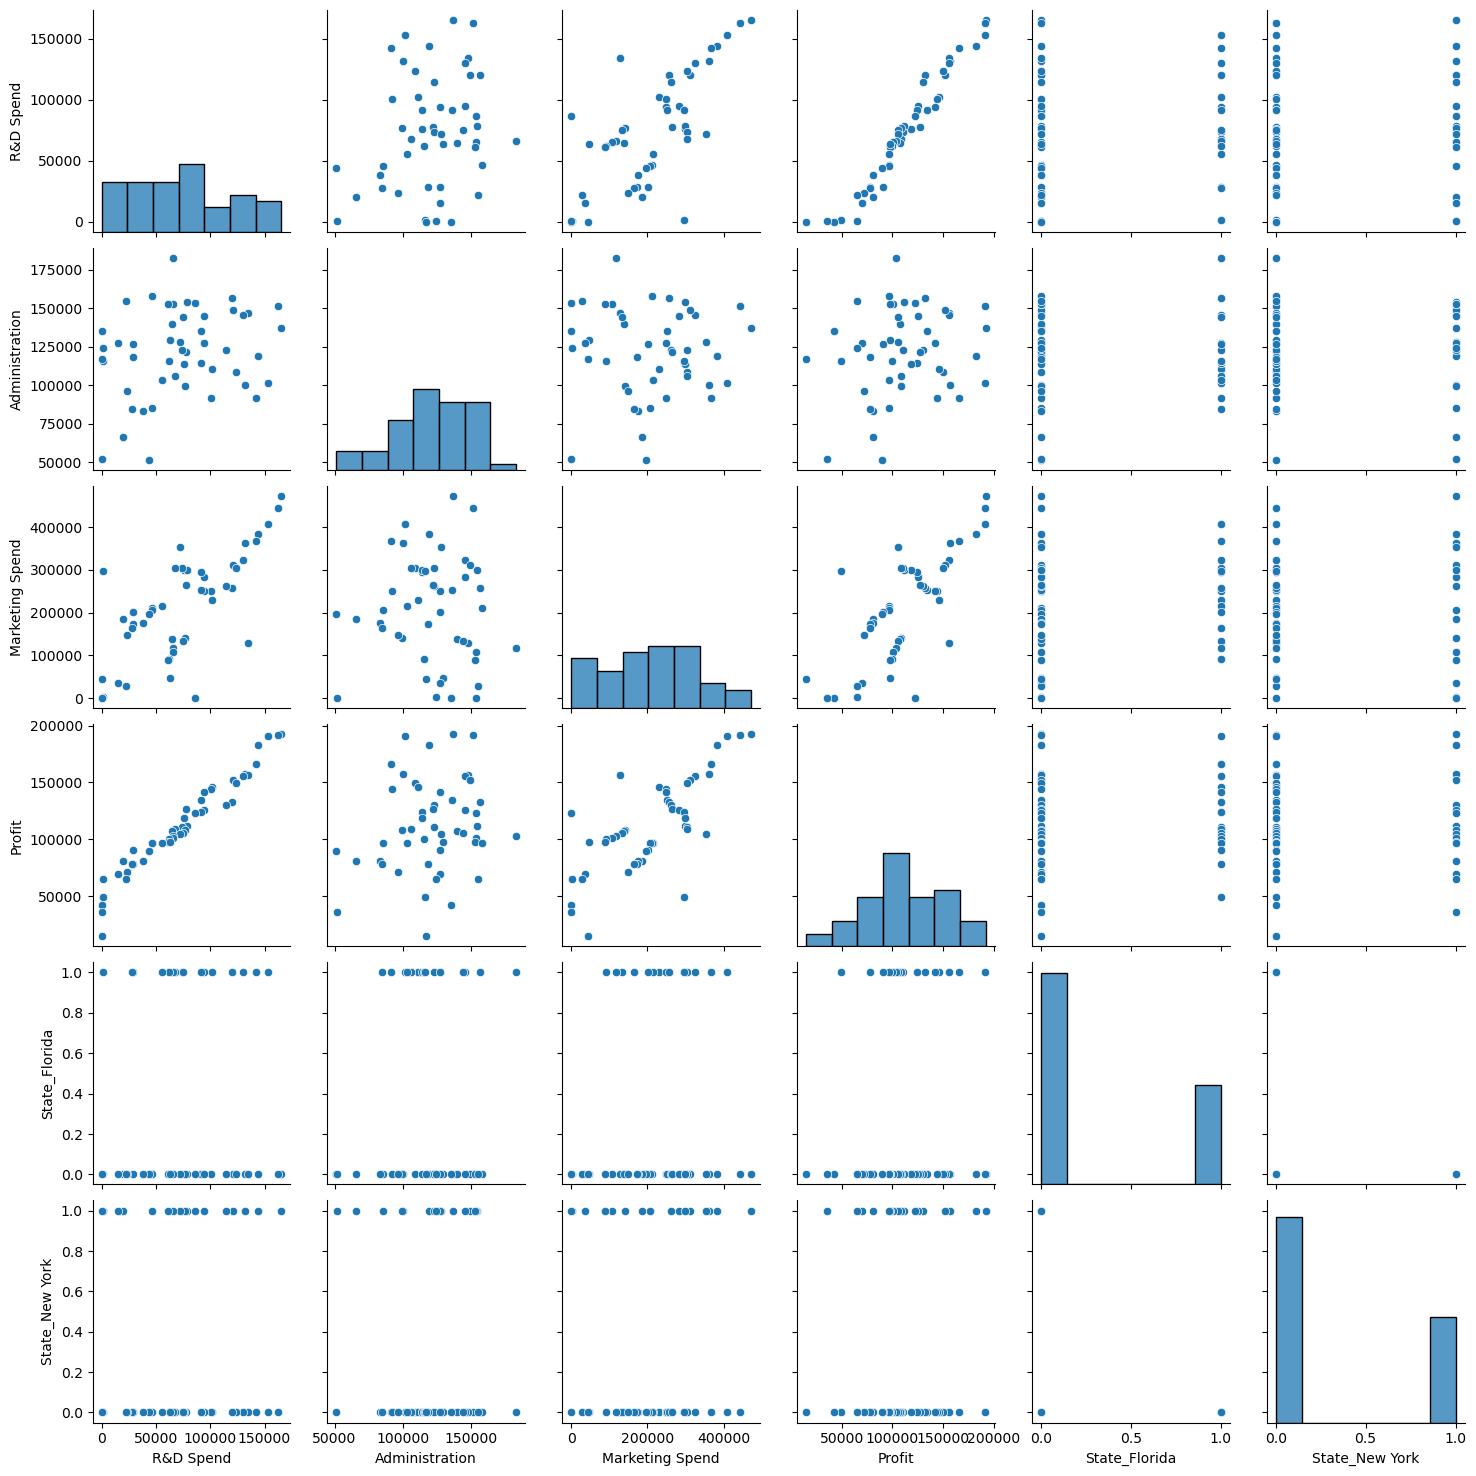

In [13]:
sns.pairplot(df)
plt.savefig("plots/pairplot.png")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

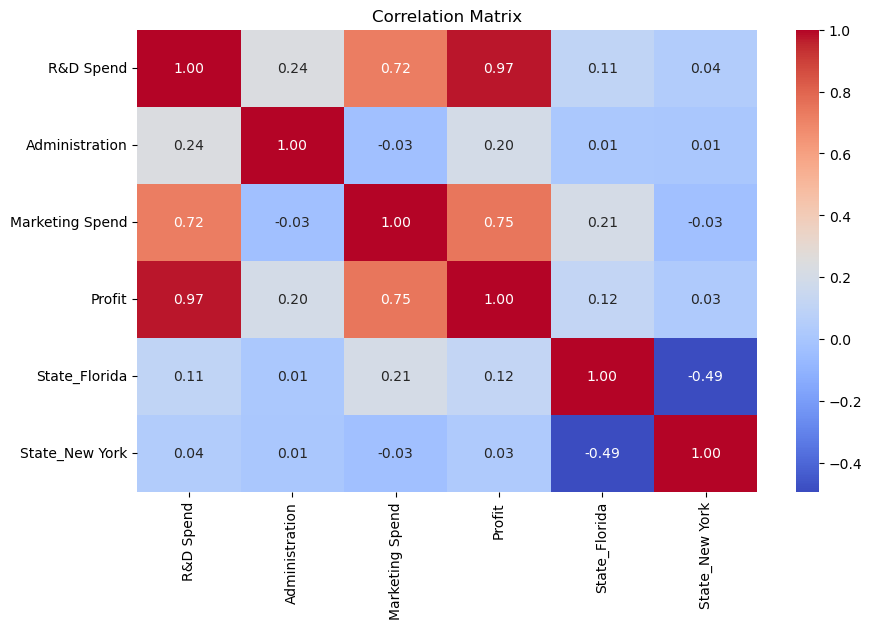

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("plots/correlation_matrix.png")
plt.show()

In [19]:
X = df.drop("Profit", axis=1)
y = df["Profit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

### Model Evaluation

In [26]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression R^2: {r2:.4f}, RMSE: {rmse:.2f}")

Linear Regression R^2: 0.8987, RMSE: 9055.96


In [28]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [30]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

In [32]:
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"Polynomial Regression R^2: {r2_poly:.4f}, RMSE: {rmse_poly:.2f}")

Polynomial Regression R^2: 0.8964, RMSE: 9161.03


In [34]:
results = pd.DataFrame({"Model": ["Linear Regression", "Polynomial Regression"],
                         "R^2 Score": [r2, r2_poly],
                         "RMSE": [rmse, rmse_poly]})
results.to_csv("model_results_startups.csv", index=False)

In [36]:
zipf=zipfile.ZipFile("plots_startups.zip","w",zipfile.ZIP_DEFLATED)
for root,dirs,files in os.walk("plots"):
    for file in files:
        zipf.write(os.path.join(root,file))
zipf.close()

In [38]:
df.to_csv("50_Startups_cleaned.csv", index=False)